<center>
<img src="https://avatars.mds.yandex.net/i?id=08831819d2b500822a90327ea7aee923ef8a5322-9154878-images-thumbs&n=13" height="250">

# Андан на экономе: домашнее задание 3
</center>


> Bicycle bicycle bicycle  <br> I want to ride my bicycle <br> I want to ride my bike <br> I want to ride my bicycle <br>  I want to ride it where I like

$\qquad$ $\qquad$ $\qquad$ $\qquad$  **[Bicycle Race (Queen)](https://www.youtube.com/watch?v=r2lT4oE4DxE)**

**ФИО:**  Гаврин Глеб Юрьевич

**Твой любимый аник:** Следствие вели с Леонидом Каневским😎 (не смотрю аниме)

## Общая информация


__Дата выдачи:__ 29.02.2024

__Мягкий дедлайн:__ 23:59MSK 19.05.2024

__Жесткий дедлайн:__ 23:59MSK 26.05.2024

## Оценивание и штрафы

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 100 баллов. За каждый день просрочки после мягкого дедлайна снимается 10 баллов. После жёсткого дедлайна работы не принимаются. Даже при опозданиии на одну секунду. Сдавайте работы заранее.

Мягкий дедлайн можно отодвинуть без потери баллов на 1,2 или 3 дня. Суммарно для откладывания в запасе есть три дня. Можно отодвинуть один дедлайн на три дня, а можно три дедлайна подвинуть на один день. Распоряжаться этими днями студент может как угодно. Жёсткий дедлайн, при этом, не меняется. Если такое произошло, нужно сообщить о сдвиге при сдаче работы.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов. Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Любой из студентов может быть вызван на защиту любого домашнего задания. В таком случае итоговая оценка студента определяется в результате защиты.

> За отсутствие названий графиков и подписей к осям могут снижаться баллы. Все картинки должны быть самодостаточны и визуально удобны для восприятия, так чтобы не нужно было смотреть ваш код или знать задание, чтобы понять что на них изображено. Выводы должны быть релевантными. Не забывайте их писать. Если в вопросе требуется ответ словами, а его нет, вы будете терять довольно много баллов.

## Формат сдачи

Сам ноутбук называйте в формате hw-02-USERNAME.ipynb, где USERNAME — ваши фамилия и имя на латинице. Задание сдаётся в anytask.

In [1]:
import numpy as np
import pandas as pd

import scipy.stats as sts
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Gavrin Gleb\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


# Спрос на велосипеды

В этой домашке мы будем работать с данными о спросе на велосипеды. Мы научимся его предсказывать.

In [3]:
df = pd.read_csv('bikes_rent.csv')
print(df.shape)
df.head( )

(731, 13)


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,4.805490,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,7.443949,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,7.437060,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,4.800998,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,5.597810,1600


__Описание переменных:__

* `season`  1 - весна, 2 - лето, 3 - осень, 4 - зима
* `yr`  0 - 2011, 1 - 2012
* `mnth`  от 1 до 12
* `holiday`  0 - нет праздника, 1 - есть праздник
* `weekday`  от 0 до 6
* `workingday`  0 - нерабочий день, 1 - рабочий день
* `weathersit`  оценка благоприятности погоды от 1 (чистый, ясный день) до 4 (ливень, туман)
* `temp`  температура в Цельсиях
* `atemp`  температура по ощущениям в Цельсиях
* `hum`  влажность
* `windspeed(mph)`  скорость ветра в милях в час
* `windspeed(ms)`  скорость ветра в метрах в секунду
* `cnt`  количество арендованных велосипедов (это целевой признак, его мы будем предсказывать)

In [4]:
# Функция для того, чтобы на одной картинке смотреть те графики с прогнозами.
def plot_yreal_ypred(y_test, y_train, y_test_hat, y_train_hat):
    """
        Рисует картинку для прогнозов регрессии 
    """
    
    margin = 0.1 # отступ на границах
    plt.figure(figsize=(10,5))
    plt.subplot(121)
    plt.scatter(y_train, y_train_hat, color="red", alpha=0.5)
    plt.xlabel('Истинные значения')
    plt.ylabel('Предсказанные значения')
    plt.axis('equal')
    plt.axis('square')
    train_min = min(y_train)
    train_max = max(y_train)
    plt.xlim(train_min - margin, train_max + margin)
    plt.ylim(train_min - margin, train_max + margin)
    plt.plot([-10000, 10000], [-10000, 10000])
    plt.title('Train set', fontsize=20)

    plt.subplot(122)
    plt.scatter(y_test, y_test_hat, color="red", alpha=0.5)
    plt.xlabel('Истинные значения')
    plt.ylabel('Предсказанные значения')
    plt.axis('equal')
    plt.axis('square')
    test_min = min(y_test)
    test_max = max(y_test)
    plt.xlim(test_min - margin, test_max + margin)
    plt.ylim(test_min - margin, test_max + margin)
    plt.plot([-10000, 10000], [-10000, 10000])
    plt.title('Test set', fontsize=20)
    pass

## 1. EDA

__а) [5 баллов]__ Проверьте, есть ли в данных пропуски 

In [5]:
df.isnull().mean()

season            0.0
yr                0.0
mnth              0.0
holiday           0.0
weekday           0.0
workingday        0.0
weathersit        0.0
temp              0.0
atemp             0.0
hum               0.0
windspeed(mph)    0.0
windspeed(ms)     0.0
cnt               0.0
dtype: float64

Пропусков в данных нет

__б) [5 баллов]__ Составьте список из категориальных переменных и список из действительных переменных.

In [6]:
var_cat = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

var_real = ['temp', 'atemp', 'hum', 'windspeed(mph)', 'windspeed(ms)']

target = 'cnt'

__в) [5 баллов]__ Нарисуйте гистограмму для целевого признака. Что можете сказать о его хвосте? Надо ли предпринять какие-нибудь манипуляции, связанные с борьбой с выбросами? 

C:\Users\Gavrin Gleb\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


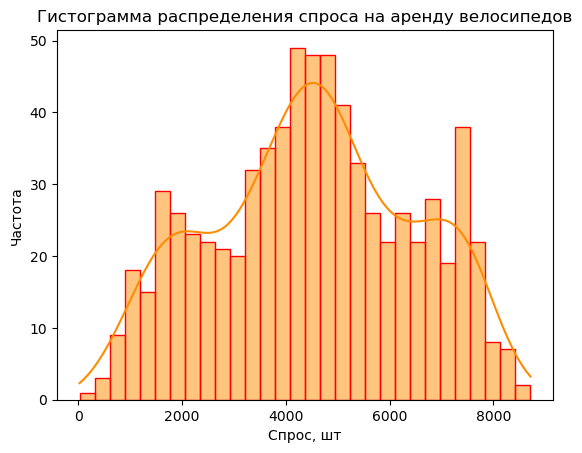

In [7]:
sns.histplot(df[target], bins=30, kde=True, color='darkorange', edgecolor='red')
 

plt.xlabel('Спрос, шт')
plt.ylabel('Частота')
plt.title('Гистограмма распределения спроса на аренду велосипедов')
 

plt.show()

Распределение похоже на нормальное, выбросов немного. Нарисуем ещё boxplot, чтобы лучше понять, надо ли бороться с выбросами

Text(0.5, 1.0, 'Выбросы в спросе на аренду велосипедов')

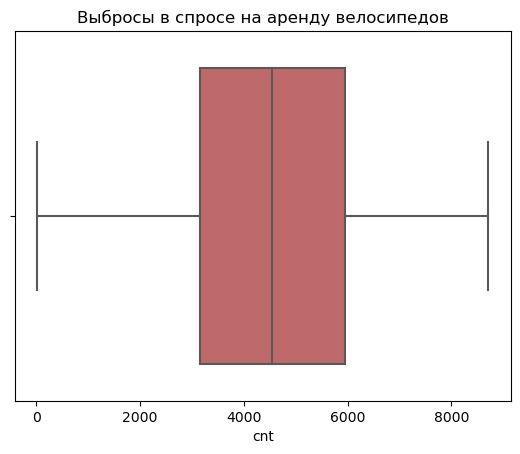

In [8]:
sns.boxplot(x=df[target], color='indianred').set_title('Выбросы в спросе на аренду велосипедов')

__Ответ:__  Заметим, что boxplot получился почти симметричным и не видно выбросов. Значит, чистить датасет мы пока не будем.

__г) [5 баллов]__ Давайте посмотрим на то, как переменные коррелируют с таргетом. Для этого постройте соответствующую облака рассеивания. 

Рассматриваем числовые переменные, так как с категориальными нет смысла строить scatterplot

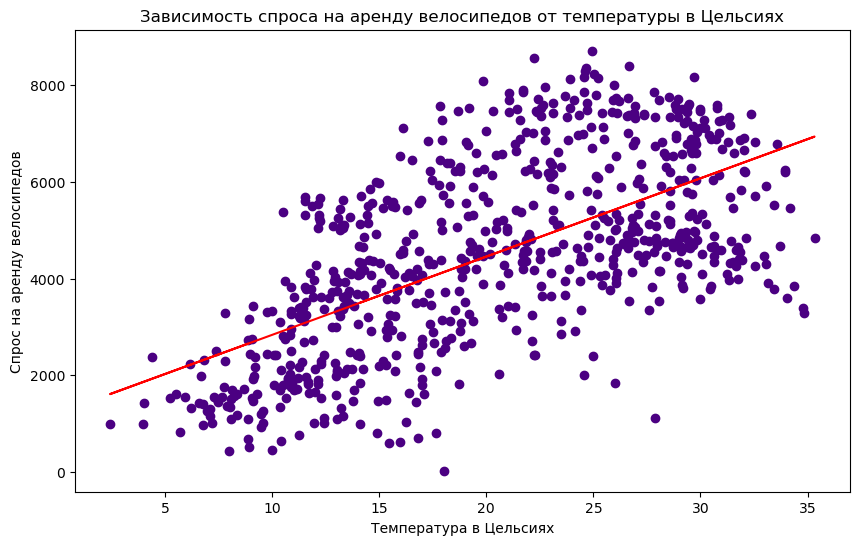

In [9]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = df['temp'], y = df['cnt'], color='indigo')
plt.xlabel("Температура в Цельсиях")
plt.ylabel("Спрос на аренду велосипедов")
plt.title('Зависимость спроса на аренду велосипедов от температуры в Цельсиях')

z = np.polyfit (df['temp'], df['cnt'], 1 )
p = np.poly1d (z)


plt.plot (df['temp'], p(df['temp']), color='red') 
plt.show()

Чётко видна прямая зависимость между температурой и спросом на аренду велосипедов. Это логично, так как **чем выше температура, тем больше людей выходят гулять на улицу и, соответственно, арендуют велосипеды.**

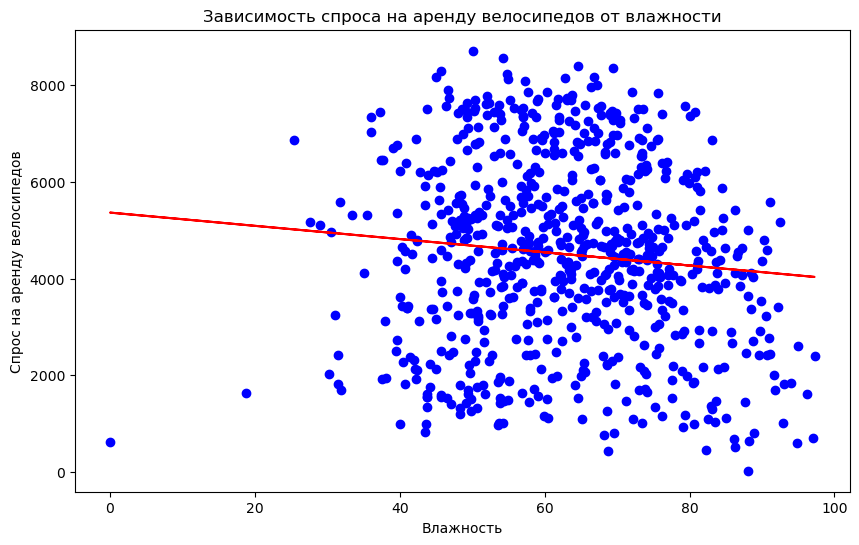

In [10]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = df['hum'], y = df['cnt'], color='blue')
plt.xlabel("Влажность")
plt.ylabel("Спрос на аренду велосипедов")
plt.title('Зависимость спроса на аренду велосипедов от влажности')

z = np.polyfit (df['hum'], df['cnt'], 1 )
p = np.poly1d (z)


plt.plot (df['hum'], p(df['hum']), color='red') 
plt.show()

Здесь зависимость обратная, но не такая выраженная. В целом **чем больше влажность, тем более вероятно, что на улице осадки, поэтому спрос на аренду велосипедов уменьшается.**

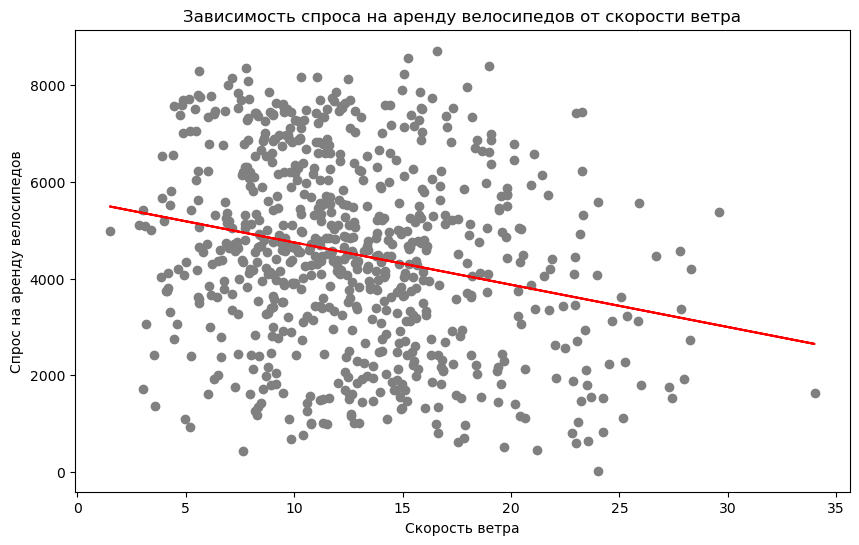

In [11]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = df['windspeed(mph)'], y = df['cnt'], color='grey')
plt.xlabel("Скорость ветра")
plt.ylabel("Спрос на аренду велосипедов")
plt.title('Зависимость спроса на аренду велосипедов от скорости ветра')

z = np.polyfit (df['windspeed(mph)'], df['cnt'], 1 )
p = np.poly1d (z)


plt.plot (df['windspeed(mph)'], p(df['windspeed(mph)']), color='red') 
plt.show()

Наблюдается довольно сильная обратная зависимость. **В ветреную погоду кататься на велосипеде некомфортно, поэтому люди меньше арендуют велосипеды.**

__д) [5 баллов]__ Каков характер зависимости числа прокатов от месяца? От каких признаков спрос зависит линейно? 



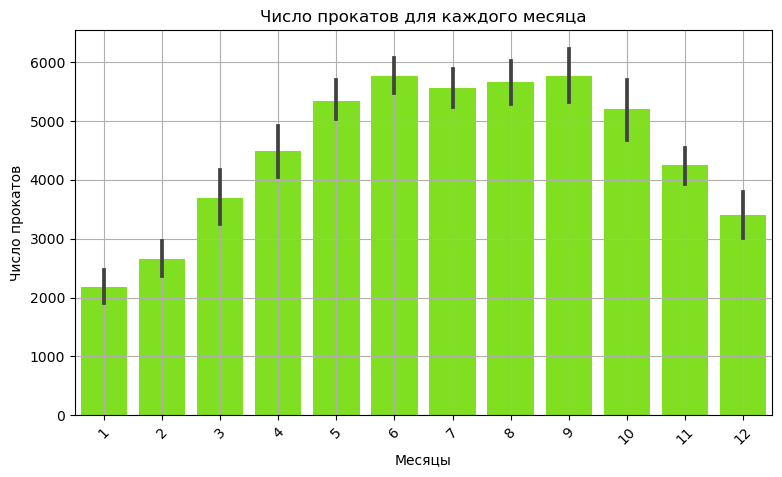

In [13]:
plt.figure(figsize=(9, 5))
df['mnth'].value_counts()
sns.barplot(data = df, x = 'mnth', y = target, color = 'chartreuse')
plt.xticks(rotation=45)
plt.grid(True)
plt.title('Число прокатов для каждого месяца')
plt.ylabel('Число прокатов')
plt.xlabel('Месяцы')
plt.show()

Очевидно, что чем **теплее месяц, тем больше спрос на аренду велосипедов.** При этом можно предположить, что в рассматриваемом году была **тёплая осень**, так как спрос в сентябре и октябре сравнимо со спросом в теплые месяцы(май-август).

__е) [5 баллов]__ Постройте гистограммы для всех непрерывных переменных. Что можете сказать о выбросах? 

Чтобы найти **линейные зависимости спроса от признаков**, построим pairplot:

C:\Users\Gavrin Gleb\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Gavrin Gleb\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Gavrin Gleb\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Gavrin Gleb\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values

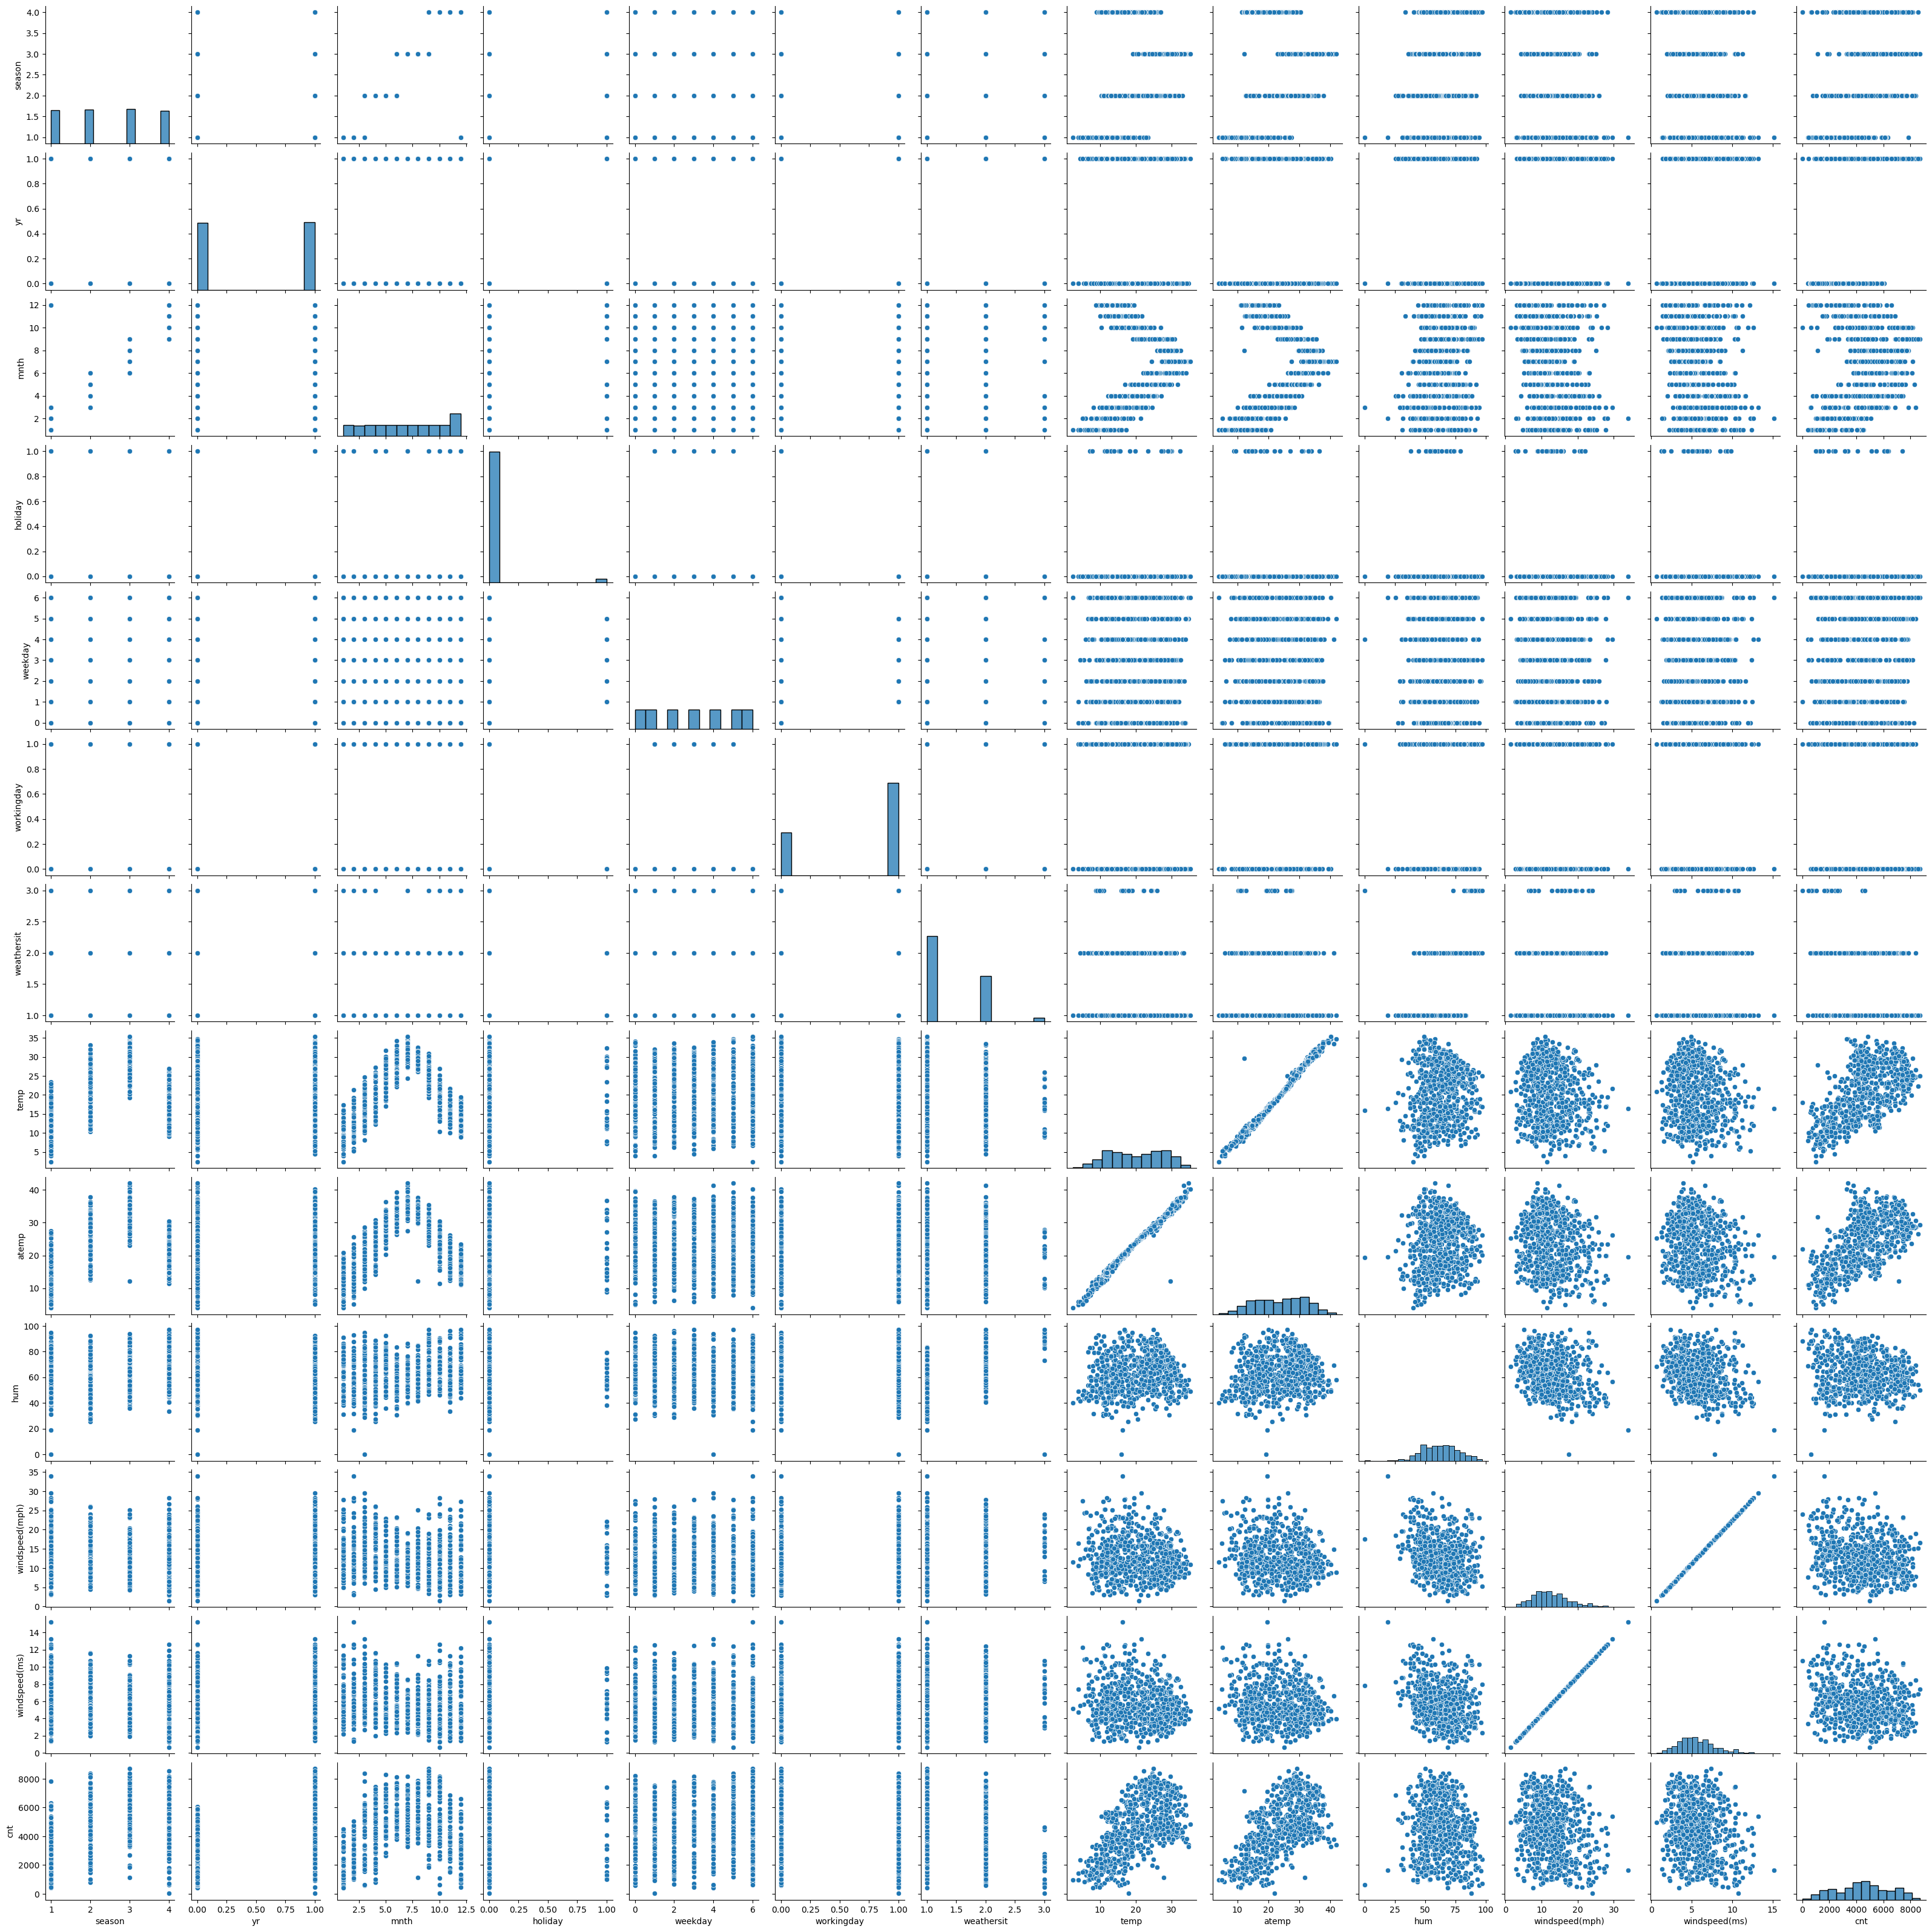

In [14]:
sns.pairplot(df)

По сути все взаимосвязи таргета с признаками, **близкие к линейным**, мы уже выявили. Это:

1) Зависимость от **температуры**
2) Зависимость от **скорости ветра**
3) Зависимость от **влажности**

Построим гистограмму для **температуры**:

C:\Users\Gavrin Gleb\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


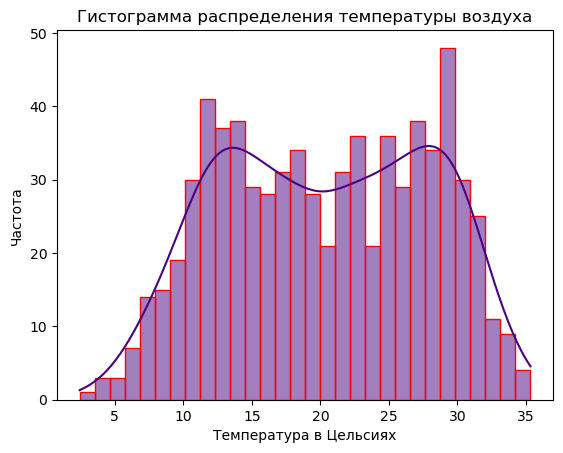

In [15]:
sns.histplot(df['temp'], bins=30, kde=True, color='indigo', edgecolor='red')
 

plt.xlabel('Температура в Цельсиях')
plt.ylabel('Частота')
plt.title('Гистограмма распределения температуры воздуха')
 

plt.show()

Для лучшего понимания структуры выбросов, построим boxplot:

Text(0.5, 1.0, 'Выбросы в температуре воздуха')

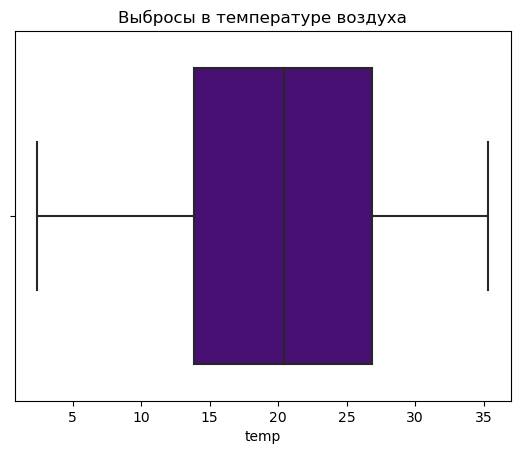

In [16]:
sns.boxplot(x=df['temp'], color='indigo').set_title('Выбросы в температуре воздуха')

Boxplot почти симметричен и нет точек вне усов(выбросы), поэтому здесь в плане выбросов все в норме.

Построим гистограмму для **температуры по ощущениям**:

C:\Users\Gavrin Gleb\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


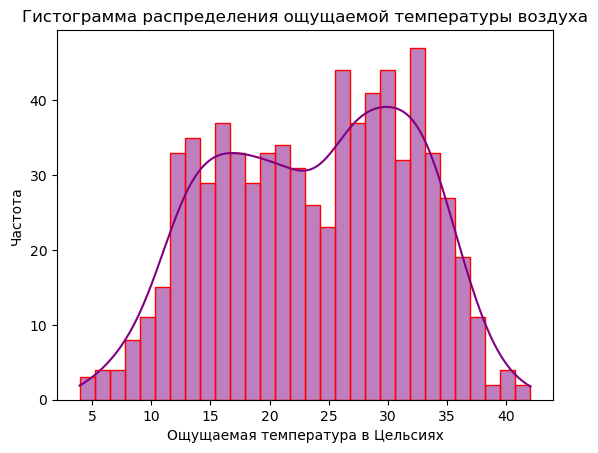

In [17]:
sns.histplot(df['atemp'], bins=30, kde=True, color='purple', edgecolor='red')
 

plt.xlabel('Ощущаемая температура в Цельсиях')
plt.ylabel('Частота')
plt.title('Гистограмма распределения ощущаемой температуры воздуха')
 

plt.show()

Здесь очень похожая ситуация и с выбросами все нормально.

Построим гистограмму для **влажности**:

C:\Users\Gavrin Gleb\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


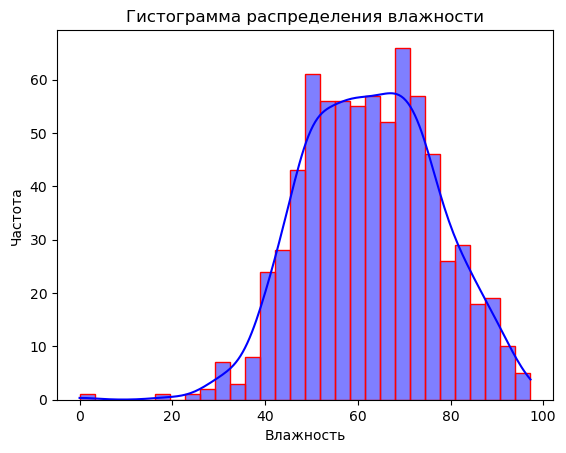

In [18]:
sns.histplot(df['hum'], bins=30, kde=True, color='blue', edgecolor='red')
 

plt.xlabel('Влажность')
plt.ylabel('Частота')
plt.title('Гистограмма распределения влажности')
 

plt.show()

Построим соответствующий boxplot:

Text(0.5, 1.0, 'Выбросы в влажности')

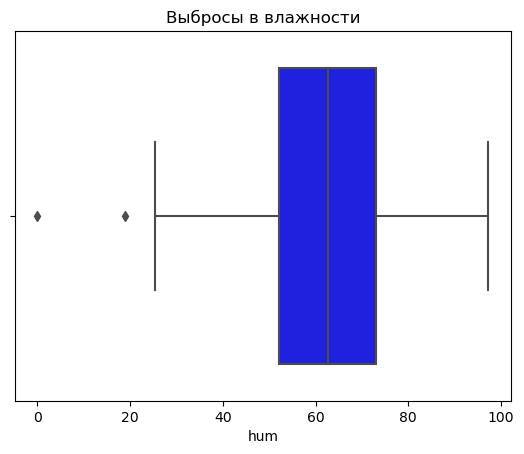

In [19]:
sns.boxplot(x=df['hum'], color='blue').set_title('Выбросы в влажности')

Выбросов здесь мало, но я решил удалить их, чтобы, возможно, улучшить качество модели.

Найдем выбросы с помощью расчёта **интерквартильного размаха:**

In [20]:
q1_hum = df['hum'].quantile(0.25)
q3_hum = df['hum'].quantile(0.75)
IQR_hum = q3_hum - q1_hum
low_hum = q1_hum - 1.5 * IQR_hum
up_hum = q3_hum + 1.5 * IQR_hum

df = df[(df['hum'] >= low_hum) & (df['hum'] <= up_hum)]
df.shape

(729, 13)

Новый boxplot:

Text(0.5, 1.0, 'Выбросы в влажности')

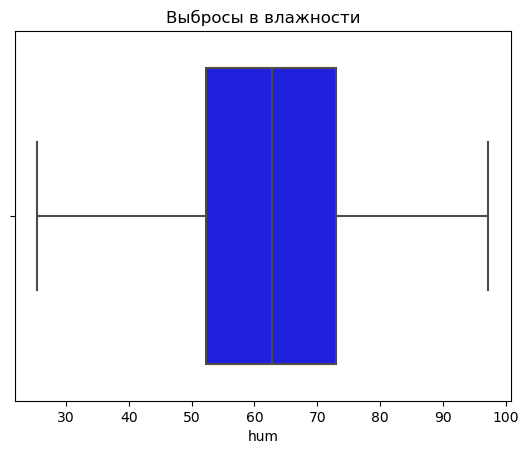

In [21]:
sns.boxplot(x=df['hum'], color='blue').set_title('Выбросы в влажности')

Теперь boxplot похож на идеальный!

Построим гистограмму для **скорости ветра в милях в час**:

C:\Users\Gavrin Gleb\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


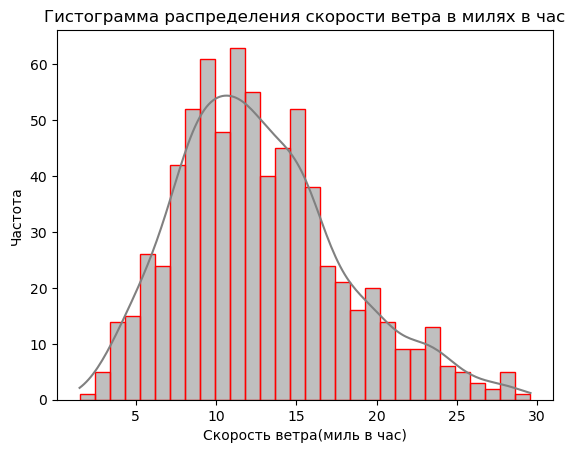

In [22]:
sns.histplot(df['windspeed(mph)'], bins=30, kde=True, color='grey', edgecolor='red')
 

plt.xlabel('Скорость ветра(миль в час)')
plt.ylabel('Частота')
plt.title('Гистограмма распределения скорости ветра в милях в час')
 

plt.show()

Text(0.5, 1.0, 'Выбросы в скорости ветра в милях в час')

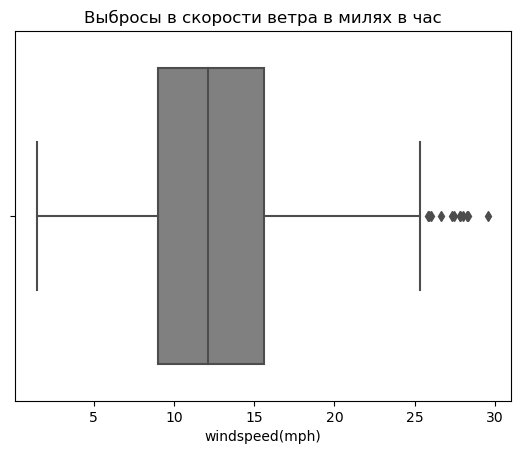

In [23]:
sns.boxplot(x=df['windspeed(mph)'], color='grey').set_title('Выбросы в скорости ветра в милях в час')

Здесь достаточно много выбросов, поэтому обработаем их с помощью уже упомянутого **интерквартильного размаха**

In [24]:
q1_mph = df['windspeed(mph)'].quantile(0.25)
q3_mph = df['windspeed(mph)'].quantile(0.75)
IQR_mph = q3_mph - q1_mph
low_mph = q1_mph - 1.5 * IQR_mph
up_mph = q3_mph + 1.5 * IQR_mph

df = df[(df['windspeed(mph)'] >= low_mph) & (df['windspeed(mph)'] <= up_mph)]
df.shape

(717, 13)

Text(0.5, 1.0, 'Выбросы в скорости ветра в милях в час')

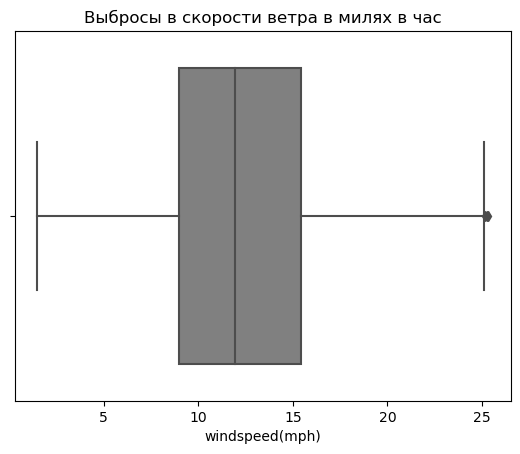

In [25]:
sns.boxplot(x=df['windspeed(mph)'], color='grey').set_title('Выбросы в скорости ветра в милях в час')

Оставшиеся выбросы несущественны, и boxplot говорит о хорошем для дальнейших шагов распределении.

Построим гистограмму для **скорости ветра в метрах в секунду:**

C:\Users\Gavrin Gleb\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


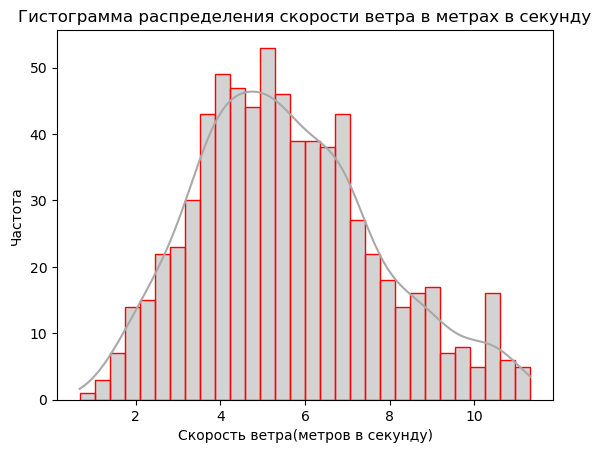

In [26]:
sns.histplot(df['windspeed(ms)'], bins=30, kde=True, color='darkgrey', edgecolor='red')
 

plt.xlabel('Скорость ветра(метров в секунду)')
plt.ylabel('Частота')
plt.title('Гистограмма распределения скорости ветра в метрах в секунду')
 

plt.show()

Text(0.5, 1.0, 'Выбросы в скорости ветра в метрах в секунду')

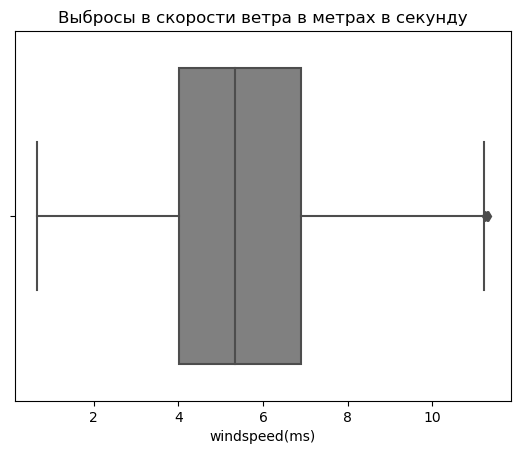

In [27]:
sns.boxplot(x=df['windspeed(ms)'], color='grey').set_title('Выбросы в скорости ветра в метрах в секунду')

Графики получились такими же, так как здесь просто другие единицы измерения, распределение от этого не меняется.

__ж) [5 баллов]__ Постройте между непрерывными признаками корреляционную матрицу. Нарисуйте её. Какие признаки, скорее всего, неинформативны? Почему они на ваш взгляд такие? 

In [28]:
neprer = [x for x in var_real]
neprer.append('cnt')
df[neprer].corr()

,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
temp,1.000000,0.991738,0.114191,-0.140169,-0.140169,0.625892
atemp,0.991738,1.000000,0.126587,-0.166038,-0.166038,0.629204
hum,0.114191,0.126587,1.000000,-0.204496,-0.204496,-0.136621
windspeed(mph),-0.140169,-0.166038,-0.204496,1.000000,1.000000,-0.216193
windspeed(ms),-0.140169,-0.166038,-0.204496,1.000000,1.000000,-0.216193
cnt,0.625892,0.629204,-0.136621,-0.216193,-0.216193,1.000000


<Axes: >

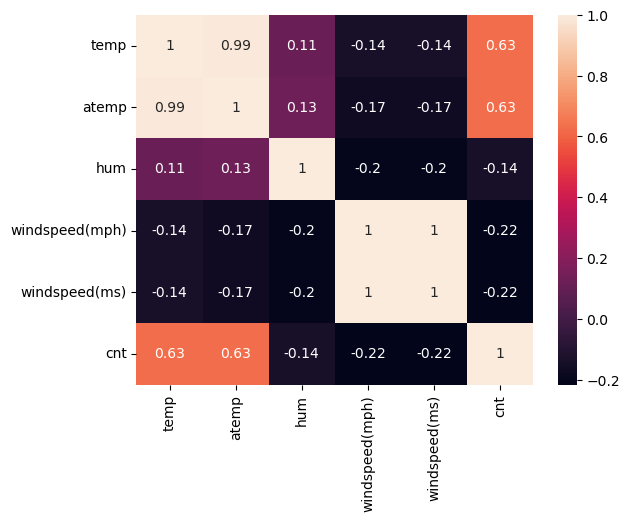

In [29]:
sns.heatmap(df[neprer].corr(), annot = True, )

__Ответ:__ На мой взгляд, нет смысла анализировать по сути одинаковые признаки windspeed(mph) и windspeed(ms).

Удалим признак скорость ветра в милях в секунду:

In [31]:
df.drop('windspeed(ms)', axis=1, inplace=True)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


__з) [5 баллов]__ Постройте для всех категориальных переменных _countplot_. Что интересного вы видите в распределеии этих признаков?  Встречаются ли слишком обширные категории, в которых очень маленькие части нам придётся объединять в категорию "другое"? 

Построим countplot для **времён года**:

Для удобства визуализации временно добавим столбец с названиями сезонов:

In [32]:
df['Season_name'] = df.apply(lambda row: 'winter' if row.season>=4 else 'autumn' if row.season>=3 else 'summer' if row.season>=2 else 'spring', axis = 1)

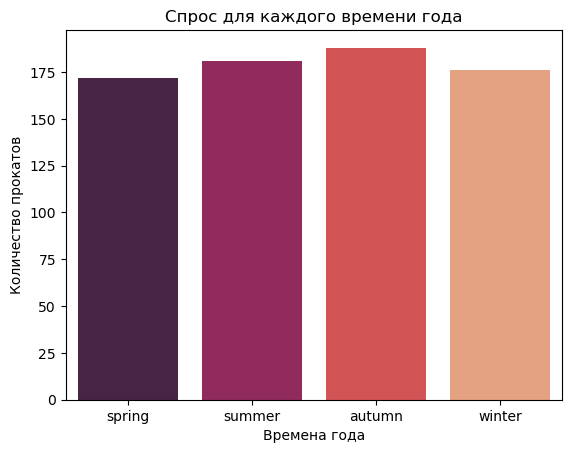

In [36]:
c_seas = sns.countplot(df, x="Season_name", palette='rocket')

legend_handles, _= c_seas.get_legend_handles_labels()


plt.xlabel('Времена года')
plt.ylabel('Количество прокатов')
plt.title('Спрос для каждого времени года')
 

plt.show()

Здесь данные собраны равномерно, это хорошо для анализа

Построим countplot для **года**:

Для этого также временно добавим столбец

In [37]:
df['YEAR'] = df.apply(lambda row: 2011 if row.yr==0 else 2012, axis = 1)

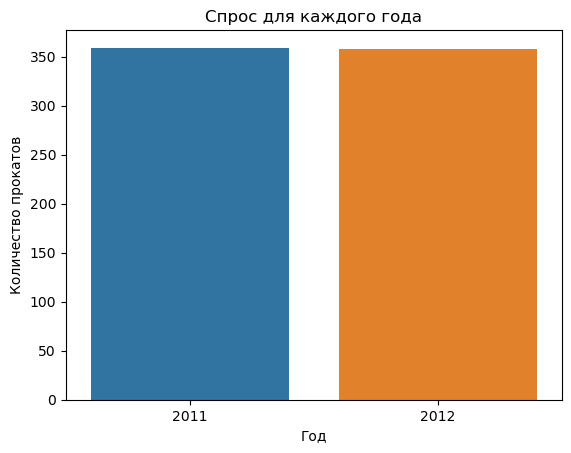

In [39]:
c_yr = sns.countplot(df, x="YEAR")

#legend_handles, _= c_seas.get_legend_handles_labels()
#c_seas.legend(legend_handles, ['Веснв','Лето','Осень', 'Зима'], bbox_to_anchor=(1,1))

plt.xlabel('Год')
plt.ylabel('Количество прокатов')
plt.title('Спрос для каждого года')
 

plt.show()

Здесь тоже наблюдения распределены в равных долях и нет дисбаланса

Для **месяцев** я не стал добавлять столбец, так как в целом понятно, что они от 1(январь) до 12(декабрь)

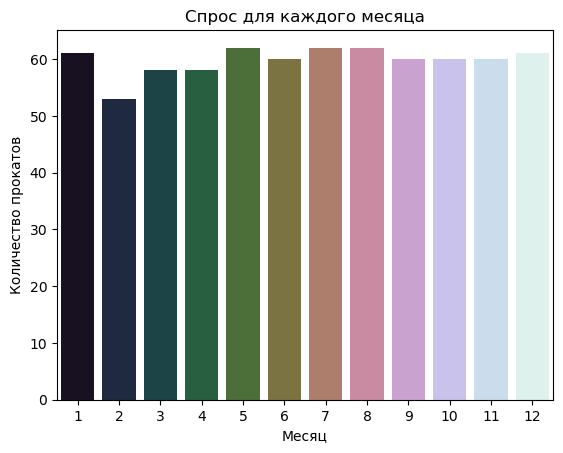

In [40]:
c_mnth = sns.countplot(df, x="mnth", palette='cubehelix')

#legend_handles, _= c_seas.get_legend_handles_labels()
#c_seas.legend(legend_handles, ['Веснв','Лето','Осень', 'Зима'], bbox_to_anchor=(1,1))

plt.xlabel('Месяц')
plt.ylabel('Количество прокатов')
plt.title('Спрос для каждого месяца')
 

plt.show()

Аналогичная ситуация - данные отлично собраны и нет проблем с анализом каких-то месяцев

Посмотрим на countplot для **праздничных и обычных дней:**

In [42]:
df['HOLIDAY'] = df.apply(lambda row: 'usual' if row.holiday==0 else 'holiday', axis = 1)

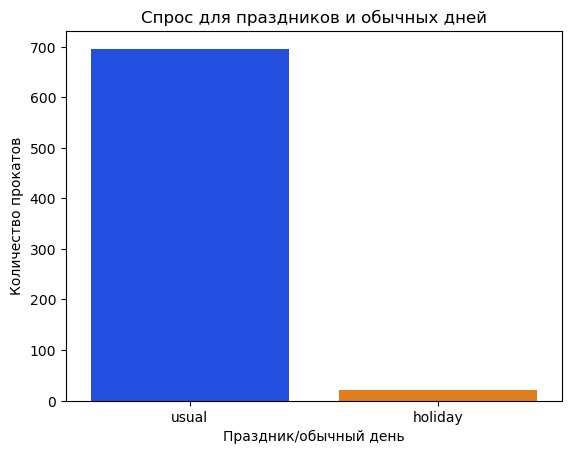

In [43]:
c_holiday = sns.countplot(df, x="HOLIDAY", palette='bright')

#legend_handles, _= c_seas.get_legend_handles_labels()
#c_seas.legend(legend_handles, ['Веснв','Лето','Осень', 'Зима'], bbox_to_anchor=(1,1))

plt.xlabel('Праздник/обычный день')
plt.ylabel('Количество прокатов')
plt.title('Спрос для праздников и обычных дней')
 

plt.show()

Здесь ожидаемо ощутимый дисбаланс классов. Праздничных дней в году не так много.

Посмотрим на countplot для **дней недели**(0-понедельник, 6-воскресенье):

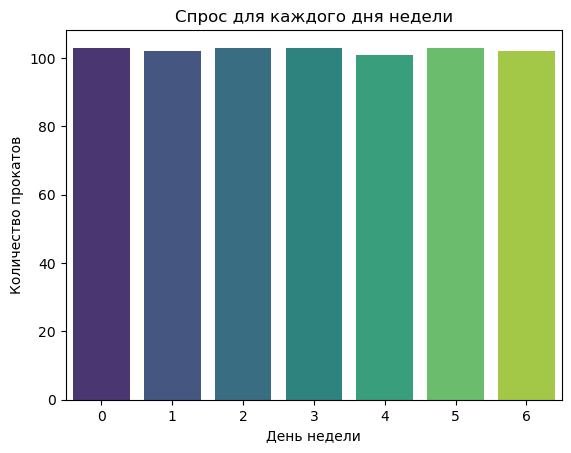

In [44]:
c_day = sns.countplot(df, x="weekday", palette='viridis')

#legend_handles, _= c_seas.get_legend_handles_labels()
#c_seas.legend(legend_handles, ['Веснв','Лето','Осень', 'Зима'], bbox_to_anchor=(1,1))

plt.xlabel('День недели')
plt.ylabel('Количество прокатов')
plt.title('Спрос для каждого дня недели')
 

plt.show()

Наблюдения сбалансированы по дням недели

In [46]:
df['WORK'] = df.apply(lambda row: 'non-working' if row.workingday==0 else 'working', axis = 1)

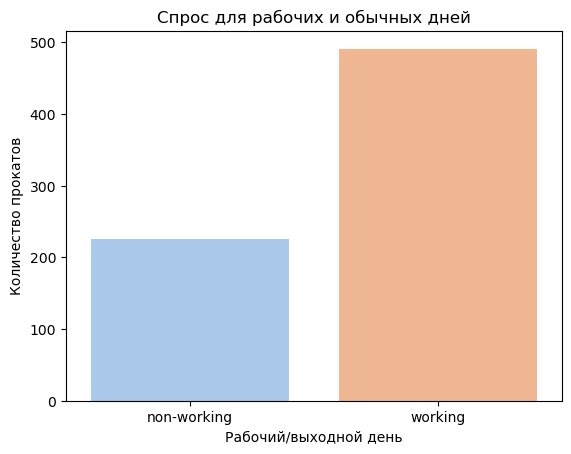

In [47]:
c_work = sns.countplot(df, x="WORK", palette='pastel')

#legend_handles, _= c_seas.get_legend_handles_labels()
#c_seas.legend(legend_handles, ['Веснв','Лето','Осень', 'Зима'], bbox_to_anchor=(1,1))

plt.xlabel('Рабочий/выходной день')
plt.ylabel('Количество прокатов')
plt.title('Спрос для рабочих и обычных дней')
 

plt.show()

Нерабочих дней в году существенно меньше, чем рабочих, поэтому наблюдается дисбаланс между классами.

Посмотрим на countplot для **оценки благоприятности погоды:**(1 - ясно, 4 - ливень/туман)

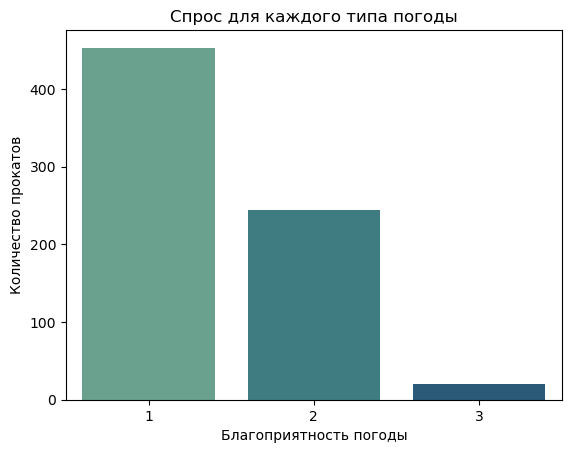

In [48]:
c_weather = sns.countplot(df, x="weathersit", palette='crest')

#legend_handles, _= c_seas.get_legend_handles_labels()
#c_seas.legend(legend_handles, ['Веснв','Лето','Осень', 'Зима'], bbox_to_anchor=(1,1))

plt.xlabel('Благоприятность погоды')
plt.ylabel('Количество прокатов')
plt.title('Спрос для каждого типа погоды')
 

plt.show()

Здесь есть дисбаланс классов, но он не критичен для дальнейшего анализа

__Ответ:__  В целом нет причин объединять какие-то части, все категориальные переменные пригодны для анализа

__и) [5 баллов]__  Сделайте OHE-кодирование. Сколько свежих OHE-признаков у нас появилось? 

In [49]:
df[['Season', 'Yr', 'Mnth', 'Holiday', 'Weekday', 'Workingday', 'Weathersit']] = df[['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']]
df0 = pd.get_dummies(df, columns=['Season', 'Yr', 'Mnth', 'Holiday', 'Weekday', 'Workingday', 'Weathersit'], dtype=int)
df0.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,Weekday_2,Weekday_3,Weekday_4,Weekday_5,Weekday_6,Workingday_0,Workingday_1,Weathersit_1,Weathersit_2,Weathersit_3
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,...,0,0,0,0,1,1,0,0,1,0
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,...,0,0,0,0,0,1,0,0,1,0
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,1,1,0,0
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,...,1,0,0,0,0,0,1,1,0,0
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,...,0,1,0,0,0,0,1,1,0,0


__к) [5 баллов]__   Некоторые из наших переменных могут вносить в спрос на велики квадратичный вклад. Например, температура. 

Сначала, когда температура возрастает, люди выходят кататься охотнее, а потом, когда становится жарко, спрос резко падает. Так возникает параболическая зависимость. 

Создайте для каждой действительной переменной из данных дополнительную переменную: её квадрат. 

In [50]:
df0['temp2'] = df0.apply(lambda row: (row.temp)**2, axis = 1)
 
df0.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,Weekday_3,Weekday_4,Weekday_5,Weekday_6,Workingday_0,Workingday_1,Weathersit_1,Weathersit_2,Weathersit_3,temp2
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,...,0,0,0,1,1,0,0,1,0,199.116003
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,...,0,0,0,0,1,0,0,1,0,222.087427
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,...,0,0,0,0,0,1,1,0,0,64.817377
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,...,0,0,0,0,0,1,1,0,0,67.240000
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,...,1,0,0,0,0,1,1,0,0,86.587436


In [51]:
df0['atemp2'] = df0.apply(lambda row: (row.atemp)**2, axis = 1)
df0['hum2'] = df0.apply(lambda row: (row.hum)**2, axis = 1)
df0['windspeed(mph)2'] = df['windspeed(mph)']**2 


In [52]:
df0.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,Weekday_6,Workingday_0,Workingday_1,Weathersit_1,Weathersit_2,Weathersit_3,temp2,atemp2,hum2,windspeed(mph)2
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,...,1,1,0,0,1,0,199.116003,330.557852,6493.668239,115.559963
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,...,0,1,0,0,1,0,222.087427,312.828200,4845.371116,277.292867
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,...,0,0,1,1,0,0,64.817377,89.685635,1912.076765,276.779887
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,...,0,0,1,1,0,0,67.240000,112.489357,3486.134892,115.343991
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,...,0,0,1,1,0,0,86.587436,131.411832,1909.314198,156.807997


__л) [5 баллов]__  Попробуйте придумать ещё какую-нибудь новую фичу (дополнительную переменную) для прогнозирования. Опишите какая за вашей фичёй стоит интуиция и почему это должно сработать при моделировании.

Мне кажется, что люди больше катаются на велосипедах, когда **выходные продолжительны**. Возьмём стандартного взрослого человека: если он планирует свой досуг на обычные выходные, то, скорее всего, у него много дел и за 2 дня тяжело найти время на катание на велосипеде. А если скоро длинные праздники(3 или более выходных дней), то вероятность, что он поедет кататься, выше!

Создадим 2 новых столбца(по формату категориальных переменных, который у нас есть), на основе столбца **workingday**:

In [53]:
wday = df0['workingday'].tolist()
li = [0]
for i in range(1, len(wday)):
    if wday[i-1] == 0 and wday[i] == 0 and wday[i+1] == 0:
        li.append(1)
        
    else:
        li.append(0)
        
        

In [54]:
df0['Long_1'] = li

In [55]:
df0['Long_0'] = np.where(df0['Long_1']==0, 1, 0)

In [56]:
df0.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,Workingday_1,Weathersit_1,Weathersit_2,Weathersit_3,temp2,atemp2,hum2,windspeed(mph)2,Long_1,Long_0
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,...,0,0,1,0,199.116003,330.557852,6493.668239,115.559963,0,1
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,...,0,0,1,0,222.087427,312.828200,4845.371116,277.292867,0,1
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,...,1,1,0,0,64.817377,89.685635,1912.076765,276.779887,0,1
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,...,1,1,0,0,67.240000,112.489357,3486.134892,115.343991,0,1
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,...,1,1,0,0,86.587436,131.411832,1909.314198,156.807997,0,1


## 2. Обучение модели

Перед обучением модели вспомним все столбцы, которые есть в нашем датасете

In [57]:
Cols = [column for column in df0]

In [58]:
print(Cols)

['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed(mph)', 'cnt', 'Season_name', 'YEAR', 'HOLIDAY', 'WORK', 'Season_1', 'Season_2', 'Season_3', 'Season_4', 'Yr_0', 'Yr_1', 'Mnth_1', 'Mnth_2', 'Mnth_3', 'Mnth_4', 'Mnth_5', 'Mnth_6', 'Mnth_7', 'Mnth_8', 'Mnth_9', 'Mnth_10', 'Mnth_11', 'Mnth_12', 'Holiday_0', 'Holiday_1', 'Weekday_0', 'Weekday_1', 'Weekday_2', 'Weekday_3', 'Weekday_4', 'Weekday_5', 'Weekday_6', 'Workingday_0', 'Workingday_1', 'Weathersit_1', 'Weathersit_2', 'Weathersit_3', 'temp2', 'atemp2', 'hum2', 'windspeed(mph)2', 'Long_1', 'Long_0']


Несколько столбцов мы создавали для удобства визуализации. Удалим их:

In [59]:
df0.drop('Season_name', axis=1, inplace=True)
df0.drop('YEAR', axis=1, inplace=True)
df0.drop('HOLIDAY', axis=1, inplace=True)
df0.drop('WORK', axis=1, inplace=True)

In [60]:
Cols_clean = [column for column in df0]

In [61]:
print(Cols_clean)

['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed(mph)', 'cnt', 'Season_1', 'Season_2', 'Season_3', 'Season_4', 'Yr_0', 'Yr_1', 'Mnth_1', 'Mnth_2', 'Mnth_3', 'Mnth_4', 'Mnth_5', 'Mnth_6', 'Mnth_7', 'Mnth_8', 'Mnth_9', 'Mnth_10', 'Mnth_11', 'Mnth_12', 'Holiday_0', 'Holiday_1', 'Weekday_0', 'Weekday_1', 'Weekday_2', 'Weekday_3', 'Weekday_4', 'Weekday_5', 'Weekday_6', 'Workingday_0', 'Workingday_1', 'Weathersit_1', 'Weathersit_2', 'Weathersit_3', 'temp2', 'atemp2', 'hum2', 'windspeed(mph)2', 'Long_1', 'Long_0']


__а) [10 баллов]__  Разбейте выборку на тренировочную и тестовую.

In [62]:
y = df0['cnt']

In [63]:
X = df0.drop('cnt', axis=1)

In [65]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.8, 
                                                    random_state=42)

__б) [10 баллов]__ Возьмите RMSE в качестве метрики качества. Для этого нужно написать свою функцию. Постройте наивный прогноз (среднее) и найдите для него RMSE. 

In [66]:
train_mean = y_train.mean()
train_mean

4578.944153577661

In [67]:
y_test_list = y_test.tolist()
y_test_list = np.array(y_test_list)
#print(y_test_list )

In [68]:
def rmse(real, prediction):

   err = prediction - real 
   err2 = err ** 2 
   mean_err = err2.mean() 
   rmse_1 = np.sqrt(mean_err) 
   return rmse_1

In [69]:
rmse_naive = rmse(y_test_list, train_mean)

In [70]:
print(f'RMSE для наивного прогноза: {rmse_naive}')

RMSE для наивного прогноза: 1954.2427129131543


__в) [5 баллов]__ Запустите код с разбиением выборки на тренировочную и тестовую, подсчётом наивного прогноза и RMSE по нему несколько раз. НЕ НАДО НИЧЕГО КОПИРОВАТЬ. ПРОСТО ПЕРЕЗАПУСТИТЕ КОД ТРИ РАЗА. Меняется ли RMSE? Почему оно меняется? К чему плохому это может привести при обучении? Как это обычно исправляют? 

__Ответ:__  Здесь RMSE не меняется, так как я установил random_seed

__г) [10 баллов]__ Оцените линейную регрессию. Насколько удалось улучшить качество прогнозирования в сравнении с наивным прогнозом?  Визуализируйте прогнозы функцией `plot_yreal_ypred`.

Что вы видите на этой визуализации? Проинтерпретируйте картинку.



In [71]:
from sklearn.linear_model import LinearRegression


y_train = np.array(y_train).reshape(-1, 1)


lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

LinearRegression()

In [72]:
from sklearn.metrics import mean_squared_error



y_test_pred = lin_model.predict(X_test) #ищем предсказанные значения
mean_squared_error(y_test, y_test_pred)

542204.5459567213

In [73]:
from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)

0.8560407560767054

Метрика R^2 показывает, что **качество модели очень хорошее**

In [74]:
y_test_pred_list = y_test_pred.tolist()
y_test_pred_list = np.array(y_test_pred_list)

In [75]:
rmse_linreg = rmse(y_test_list, y_test_pred_list)

In [76]:
print(f'RMSE для прогноза линейной регрессии: {rmse_linreg}')

RMSE для прогноза линейной регрессии: 2663.7755705345885


In [77]:
# Функция для того, чтобы на одной картинке смотреть те графики с прогнозами.
def plot_yreal_ypred(y_test, y_train, y_test_pred):
    """
        Рисует картинку для прогнозов регрессии 
    """
    
    margin = 0.1 # отступ на границах
    plt.figure(figsize=(10,5))
    plt.subplot(121)
    plt.scatter(y_train, y_train, color="red", alpha=0.5)
    plt.xlabel('Истинные значения')
    plt.ylabel('Предсказанные значения')
    plt.axis('equal')
    plt.axis('square')
    train_min = min(y_train)
    train_max = max(y_train)
    plt.xlim(train_min - margin, train_max + margin)
    plt.ylim(train_min - margin, train_max + margin)
    plt.plot([-10000, 10000], [-10000, 10000])
    plt.title('Train set', fontsize=20)

    plt.subplot(122)
    plt.scatter(y_test, y_test_pred, color="red", alpha=0.5)
    plt.xlabel('Истинные значения')
    plt.ylabel('Предсказанные значения')
    plt.axis('equal')
    plt.axis('square')
    test_min = min(y_test)
    test_max = max(y_test)
    plt.xlim(test_min - margin, test_max + margin)
    plt.ylim(test_min - margin, test_max + margin)
    plt.plot([-10000, 10000], [-10000, 10000])
    plt.title('Test set', fontsize=20)
    pass

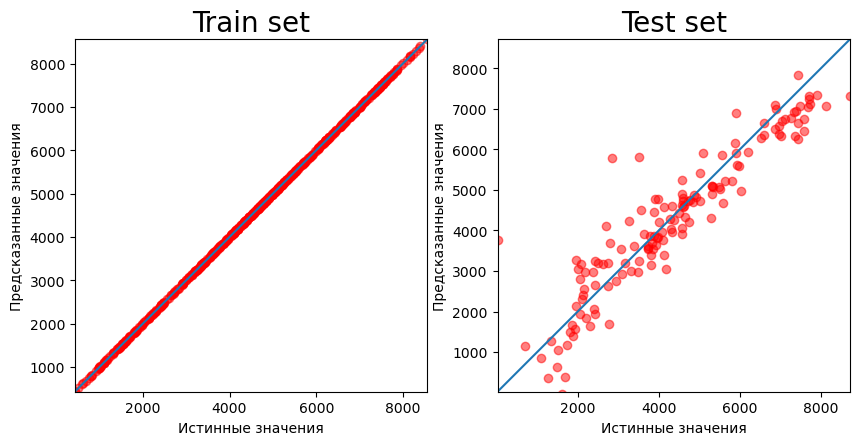

In [78]:
plot_yreal_ypred(y_test, y_train, y_test_pred)

__Ответ:__ Мы видим, что **линейная регрессия довольно хорошо предсказывает значения.** Об этом говорит и **R^2 = 0.85**

__д) [10 баллов]__ Какими получились значения перед коэффициентами у вашей модели?  Как думаете, почему такое произошло? 



In [82]:
lin_model.coef_ #коэфициенты перед независимой переменной

array([[ 4.31443076e+02,  6.44613839e+02, -4.31917042e+01,
        -1.18117678e+02,  5.47485045e+01,  5.68169098e+01,
        -4.48538684e+02,  5.73275686e+02, -1.29934302e+02,
         5.55159170e+01, -2.99200853e+01, -2.82640546e+02,
         2.24155280e+02, -3.18319967e+01,  9.03172632e+01,
        -6.44613839e+02,  6.44613839e+02, -7.06356379e+01,
        -3.11164932e+02,  5.02393266e+00, -2.66912788e+02,
         2.51479578e+02,  2.65491324e+02,  1.14925602e+02,
         2.07252445e+02,  5.69174288e+02,  6.72604308e+01,
        -5.77066558e+02, -2.54827686e+02,  1.18117678e+02,
        -1.18117678e+02, -3.73963514e+01,  5.55141658e+01,
        -7.57568204e+00,  3.81061995e+01, -4.46116441e+01,
        -1.02733807e+02,  9.86971192e+01, -5.68169098e+01,
         5.68169098e+01,  1.34795253e+02,  1.78948178e+02,
        -3.13743431e+02, -1.08818345e+01,  1.99820445e+00,
        -6.24211768e-01, -4.73531464e-01,  7.20981946e+01,
        -7.20981946e+01]])

In [83]:
lin_model.intercept_ #свободный коэффициент

array([-1544.98222553])

__Ответ:__  Значения получились такими потому, что большинство переменных(действительных) <100, а спрос на велосипеды в большинстве случаев >1000

если говорить про знак, то от каких-то признаков у спроса **обратная зависимость(влажность, скорость ветра и др.) => знак -**, а от каких-то **прямая(температура и др.) => знак +**

## 3. Бонус

__a) [2 балла]__ Обучите Lasso-регрессию. В качестве силы регуляризации возьмите $\alpha = 40$. 

* Каким получилось качество прогноза? 
* Что в модели произошло с коэффициентами?  

In [81]:
from sklearn.linear_model import Lasso

In [84]:
from sklearn. linear_model import LassoCV
from sklearn. model_selection import RepeatedKFold


#define cross-validation method to evaluate model
cv = RepeatedKFold(n_splits= 10 , n_repeats= 3 , random_state= 1 )

#define model
model_lasso = Lasso(alpha= 40)

#fit model
model_lasso.fit(X_train, y_train)

#display lambda that produced the lowest test MSE
print(model_lasso. alpha)

40


In [85]:
y_test_pred_lasso = model_lasso.predict(X_test) #ищем предсказанные значения
mean_squared_error(y_test, y_test_pred_lasso)

586680.0292069011

In [86]:
y_test_pred_lasso_list = y_test_pred_lasso.tolist()
y_test_pred_list = np.array(y_test_pred_lasso_list)

In [87]:
rmse_lasso = rmse(y_test_list, y_test_pred_lasso_list)
print(f'RMSE для прогноза лacco регрессии: {rmse_lasso}')

RMSE для прогноза лacco регрессии: 765.9504091042064


In [88]:
print(f'R2 у Лассо-регрессии = {r2_score(y_test, y_test_pred_lasso)}')

R2 у Лассо-регрессии = 0.8442321923352829


__Ответ:__   RMSE уменьшилось, R^2 почти не изменилось. Качество прогноза **отличное**

In [89]:
model_lasso.coef_

array([ 3.53749517e+02,  1.70619686e+03, -2.23054079e+01, -0.00000000e+00,
        4.57718547e+01,  0.00000000e+00, -1.69124266e+02,  5.00283376e+02,
        0.00000000e+00,  4.89889523e+01, -0.00000000e+00, -0.00000000e+00,
        5.08845220e+01, -0.00000000e+00,  0.00000000e+00, -3.27859202e+01,
        2.54053753e-14,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -8.45226130e+00,
       -5.00312978e-01, -6.25386636e-01, -1.83771197e+00, -0.00000000e+00,
        0.00000000e+00])

Lasso регуляризация зануляет коэфы перед, по ее мнению, **неважными признаками.** Поэтому многие коэфы в матрице равны 0. Это зачастую улучшает прогноз и помогает увидеть признаки, которые вряд ли **существенно влияют** на целевую переменную

__б) [0 баллов]__  Изучите код в этом пункте и прочитайте выводы. Подумайте об этом. 

В случае линейных моделей, обычно, используют два вида регуляризации: Ridge и Lasso. Первая прибавляет к MSE квадраты коэффицентов, а вторая модули. Давайте посмотрим какая между ними разница.

In [90]:
from sklearn.linear_model import Lasso, Ridge  # подгружаем модели

Обучим много-много моделей с разными силами регуляризации $\alpha$ и посмотрим что получится.

In [91]:
alphas = np.arange(1, 100, 2)   # задали диапазон для силы регуляризатора

# матрицы для весов перед коэффициентами (число регрессоров)*(число признаков)
coefs_lasso = np.zeros((alphas.shape[0], X.shape[1]))
coefs_ridge = np.zeros((alphas.shape[0], X.shape[1]))

i = 0
for alph in alphas:
    rg = Ridge(alpha=alph)  # для каждого alph обучаем модель
    ls = Lasso(alpha=alph)
    rg.fit(X,y)
    ls.fit(X,y)
    coefs_ridge[i] = rg.coef_  # и запоминаем коэффициенты
    coefs_lasso[i] = ls.coef_
    i += 1

C:\Users\Gavrin Gleb\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.721e+08, tolerance: 2.677e+05
  model = cd_fast.enet_coordinate_descent(
C:\Users\Gavrin Gleb\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.567e+08, tolerance: 2.677e+05
  model = cd_fast.enet_coordinate_descent(
C:\Users\Gavrin Gleb\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2

В отличие от L2-регуляризации (Ridge), L1 (Lasso) обнуляет веса при некоторых признаках. Давайте пронаблюдаем, как меняются веса при увеличении коэффициента регуляризации $\alpha$ (в лекции коэффициент при регуляризаторе мог быть обозначен другой буквой).

__в) [2 балла]__ Подберите для Lasso-регрессии с помощью поиска по решётке оптимальное значение $\alpha$.  Каким оказалось это значение? 
 

In [94]:
#define predictor and response variables
#X = 
#y = data["hp"]

#define cross-validation method to evaluate model
cv = RepeatedKFold(n_splits= 10 , n_repeats= 3 , random_state= 1 )

#define model
model_lasso_best = LassoCV(alphas=np.arange(0, 50, 0.5), cv=cv, n_jobs=-1)

#fit model
model_lasso_best.fit(X_train, y_train)

#display lambda that produced the lowest test MSE
print(model_lasso_best.alpha_ )


C:\Users\Gavrin Gleb\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1568: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Gavrin Gleb\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 52387159.97243497, tolerance: 194565.05338062014
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Gavrin Gleb\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 92708596.40139456, tolerance: 194565.05338062014
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Gavrin Gleb\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:6

3.0


C:\Users\Gavrin Gleb\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 33839933.69912514, tolerance: 187833.67636899225
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Gavrin Gleb\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 114901050.50921865, tolerance: 190753.0708300388
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Gavrin Gleb\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Gavrin Gleb\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_de

In [96]:
print(model_lasso_best.alpha_ )  #при таком поиске лучшим альфа оказалась тройка

3.0


__г) [2 балла]__ Каким получается качество прогноза для модели с оптимальным значением $\alpha$? 

In [98]:
y_test_pred_lasso_best = model_lasso_best.predict(X_test) #ищем предсказанные значения
mean_squared_error(y_test, y_test_pred_lasso_best)

540198.3616540609

In [101]:
y_test_pred_lasso_best_list = y_test_pred_lasso_best.tolist()
y_test_pred_best_list = np.array(y_test_pred_lasso_best_list)

In [102]:
rmse_lasso_best = rmse(y_test_list, y_test_pred_best_list)
print(f'RMSE для прогноза лacco регрессии с альфа=3: {rmse_lasso_best}')

RMSE для прогноза лacco регрессии с альфа=3: 734.981878452837


**Качество улучшилось существенно!**

__д) [2 балла]__ Наконец, как принято в анализе данных, давайте проинтерпретируем результат. Проинтерпретируйте последнюю обученую модель. У каких признаков наибольшие положительные коэфициенты? У каких наибольшие отрицательные? Логично ли утверждать, что чем больще/меньше эти признаки, тем выше/ниже спрос на велосипеды? Какие коэффициенты занулились? 

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

__Ответ:__  ....

__е) [2 балла]__ В прошлой домашке, когда мы придумывали фичи, мы предположили, что спрос на велосипеды зависит от скорости ветра квадратично, по параболе. Подтвердилось ли это предположение? 

__Ответ:__  ...